# Neural Network For Handwritten Digits Classification 

In [1]:
# Import Important Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

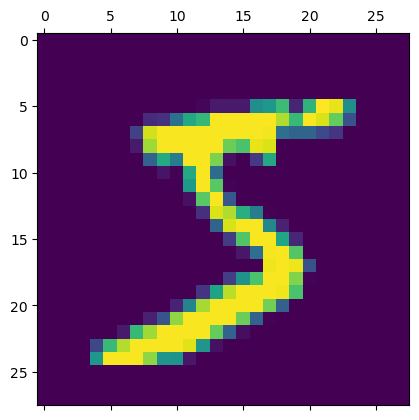

In [8]:
plt.matshow(X_train[0])

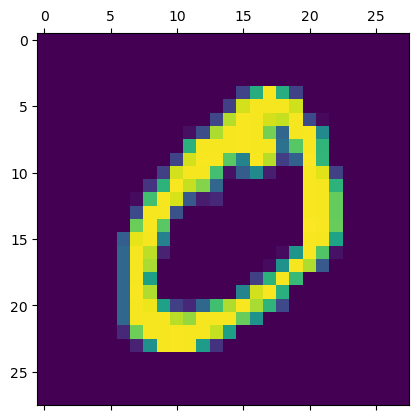

In [9]:
plt.matshow(X_train[1])

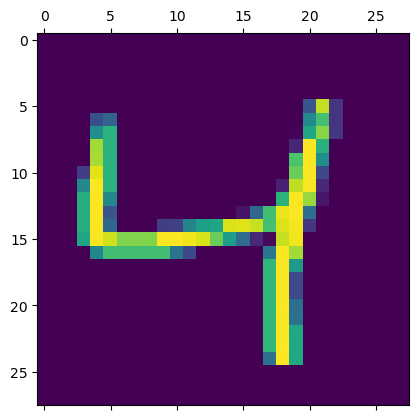

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_test_flattened.shape

(10000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)



Epoch 1/5


1875/1875 [==============================] - 2s 796us/step - loss: 0.4708 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.3047 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.2668 - accuracy: 0.9251


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 780us/step - loss: 0.2730 - accuracy: 0.9240


[0.27295640110969543, 0.9240000247955322]

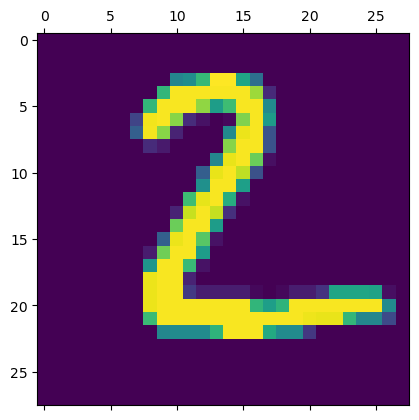

In [21]:
plt.matshow(X_test[1])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 645us/step


array([3.7567711e-01, 8.9833532e-03, 9.9959719e-01, 5.4147083e-01,
       4.2115975e-10, 8.8949949e-01, 8.3447802e-01, 9.0052553e-13,
       2.5523692e-01, 1.8066731e-09], dtype=float32)

In [23]:
np.argmax(y_predicted[1])

2

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1111,    3,    3,    0,    1,    3,    2,   12,    0],
       [   8,   10,  914,   22,    7,    3,   10,   12,   44,    2],
       [   1,    0,   12,  937,    0,   19,    2,   12,   22,    5],
       [   2,    1,    7,    2,  904,    0,   10,    7,   15,   34],
       [  10,    2,    4,   45,    8,  766,   12,    7,   32,    6],
       [  12,    3,    9,    1,    8,   16,  903,    2,    4,    0],
       [   1,    6,   22,    7,    4,    0,    0,  967,    4,   17],
       [   5,    7,    6,   27,    9,   19,    7,   13,  876,    5],
       [  11,    7,    1,   12,   23,    7,    0,   43,    9,  896]])>

Text(95.72222222222221, 0.5, 'Truth')

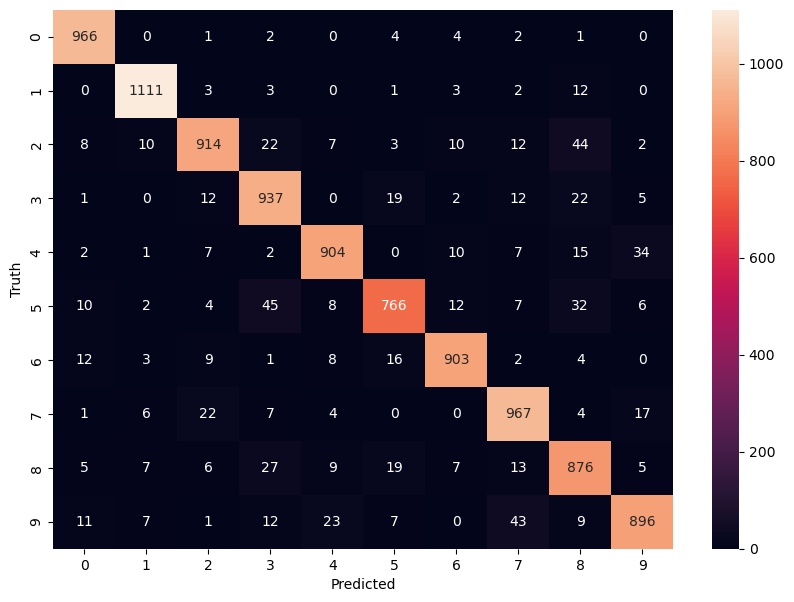

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1208 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0852 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0517 - accuracy: 0.9842


In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 785us/step - loss: 0.0752 - accuracy: 0.9763


[0.07515647262334824, 0.9763000011444092]

313/313 [==============================] - 0s 657us/step


Text(95.72222222222221, 0.5, 'Truth')

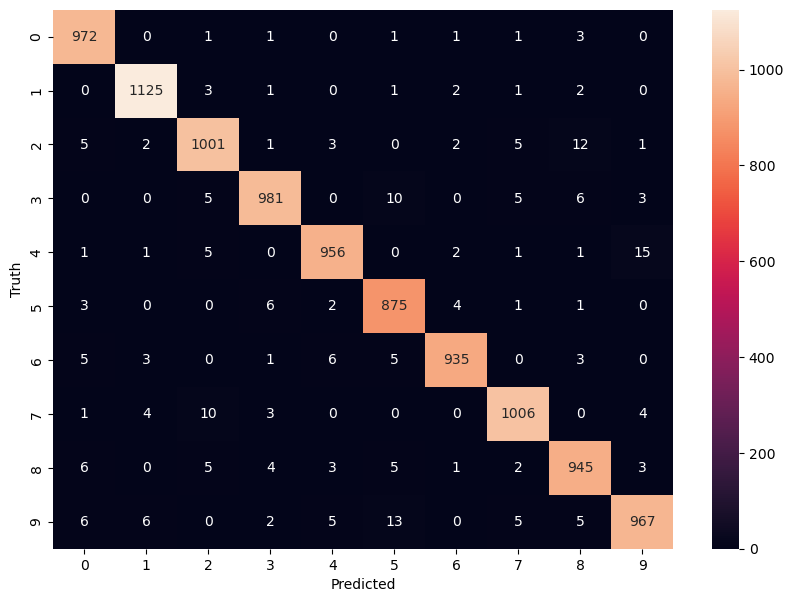

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1236 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0423 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0332 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 824us/step - loss: 0.0849 - accuracy: 0.9755


[0.08489863574504852, 0.9754999876022339]